In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'] ].values / 100 

In [4]:
categorical_research_features = data[ [ 'Research' ] ].values 

In [5]:
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )

In [6]:
Y = data[ [ 'Chance of Admit' ] ].values

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [8]:
X_treino = tf.constant( train_features , dtype=tf.float32 )
Y_treino = tf.constant( train_labels , dtype=tf.float32 ) 

In [9]:
X_teste = tf.constant( test_features , dtype=tf.float32 ) 
Y_teste = tf.constant( test_labels , dtype=tf.float32 ) 

In [10]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

In [11]:
def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

In [12]:
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [15]:
num_epochs = 10
num_samples = X_treino.shape[0]
batch_size = 10
learning_rate = 0.001

num_features = X_treino.shape[1]

In [16]:
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

In [17]:
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

In [18]:
dataset = tf.data.Dataset.from_tensor_slices(( X_treino , Y_treino )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [19]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = './logregmodel/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)


In [20]:

print('\nIniciando o Treinamento:')

# Loop para o treinamento
for i in range( num_epochs ) :
    
    epoch_loss = list()

    for b in range( int(num_samples/batch_size) ):

        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output )
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 

    with train_summary_writer.as_default():
        tf.summary.scalar('loss', loss, step=i)
    
    print( 'A taxa de erro é igual a {}'.format( loss ) ) 


Iniciando o Treinamento:
A taxa de erro é igual a 0.07420697063207626
A taxa de erro é igual a 0.040940966457128525
A taxa de erro é igual a 0.02488480694591999
A taxa de erro é igual a 0.017151804640889168
A taxa de erro é igual a 0.01344727911055088
A taxa de erro é igual a 0.011633364483714104
A taxa de erro é igual a 0.010727189481258392
A taxa de erro é igual a 0.010280073620378971
A taxa de erro é igual a 0.010079042986035347
A taxa de erro é igual a 0.009964696131646633


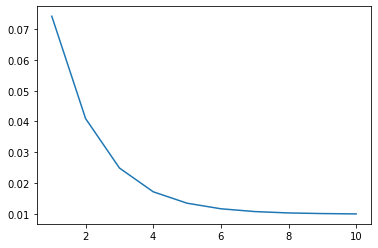

In [21]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()


In [22]:
output = h( X_teste , weights , bias ) 
labels = Y_teste

In [23]:
accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( '\nMean Absolute Error (MAE) = {}'.format( accuracy_op.result().numpy() ) )
print('\n')

print('\nUm estudante com as características abaixo:')
tf.print(X_teste[0,:])
print('\nTeria o seguinte percentual de ser admitido na Universidade:')
tf.print(Y_teste[0] * 100)
print('\n')


Mean Absolute Error (MAE) = 0.07789578288793564



Um estudante com as características abaixo:
[3.22 1.03 0.04 ... 0.025 0.0802 1]

Teria o seguinte percentual de ser admitido na Universidade:
[61]




In [24]:
!tensorboard --logdir=/logregmodel

^C
